# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Indest Data

In [2]:
df = pd.read_csv('Frozen_Dessert_Production.csv',index_col='DATE', parse_dates=True)
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [4]:
df.shape

(573, 1)

In [5]:
df.describe()

,IPN31152N
count,573.000000
mean,109.895545
std,27.950571
min,58.659800
25%,88.935500
50%,107.643000
75%,128.277700
max,196.173700


In [6]:
df.isnull().sum()

IPN31152N    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['IPN31152N'], dtype='object')

In [9]:
df.rename(columns={"IPN31152N" :"Production"}, inplace=True)

In [10]:
df.columns

Index(['Production'], dtype='object')

In [11]:
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [12]:
df.tail()

,Production
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


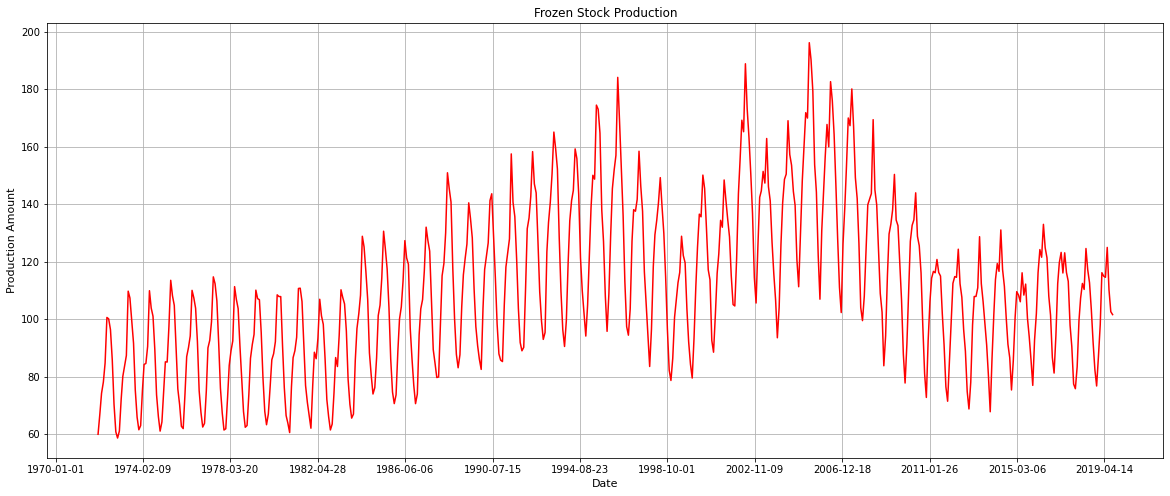

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df["Production"],color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Production Amount', fontsize='11')
plt.title('Frozen Stock Production')
plt.grid()
plt.show()

In [14]:
df.iloc[df["Production"].argmax()]

Production    196.1737
Name: 2005-06-01 00:00:00, dtype: float64

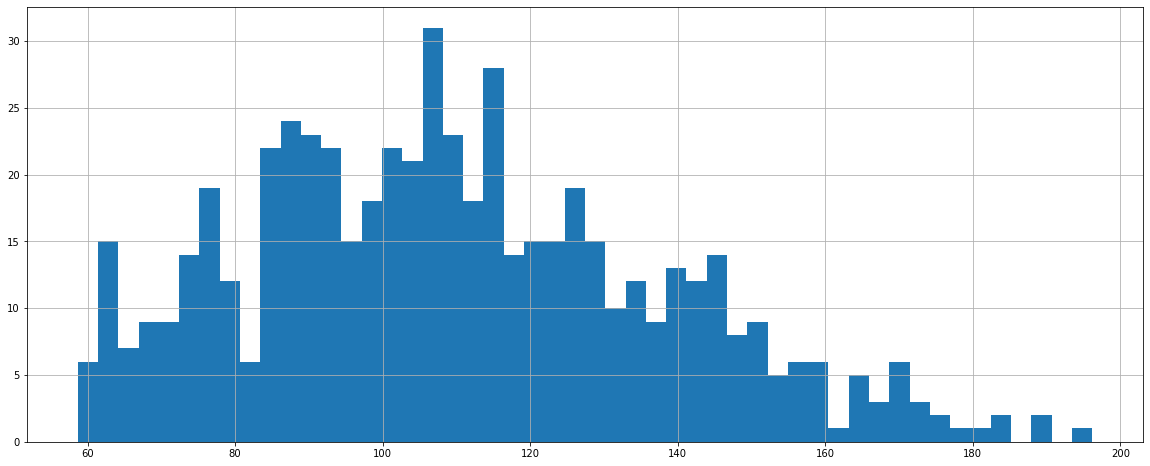

In [15]:
df['Production'].hist(bins=50, figsize=(20,8));

<AxesSubplot:xlabel='DATE'>

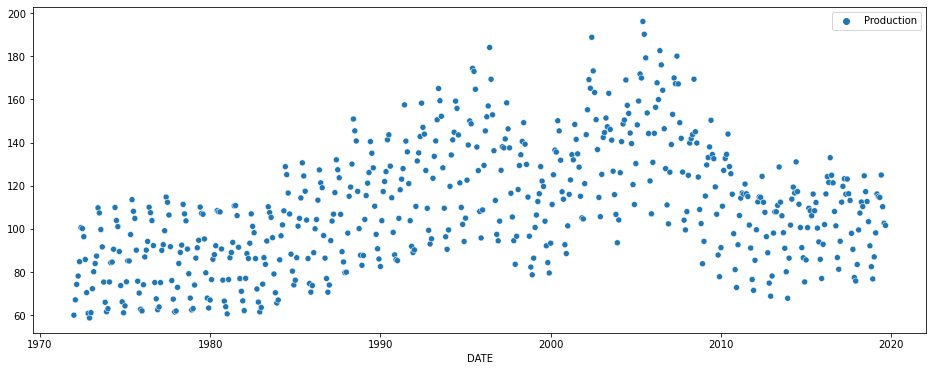

In [16]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df)

## Preprocessing of Data

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
len(df)

573

In [19]:
test_size = 24

In [20]:
test_len = len(df)-test_size

In [21]:
test_ind = len(df)- test_size
test_ind

549

In [22]:
train = df.iloc[:test_ind]

test = df.iloc[test_ind:]

In [23]:
train 

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2017-05-01,116.0635
2017-06-01,123.0870
2017-07-01,116.2639


In [24]:
test 

,Production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


### Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [28]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [29]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [30]:
len(generator)

537

In [31]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [32]:
X, y = generator[0]

In [33]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


## Modelling & Model Performance

### Import related libraries

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Creating Model

### with "tanh" activation function

In [35]:
n_features = train_scaled.shape[1]

In [36]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', input_shape = (length, n_features))) #return_sequences=True, 
#model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1)) 
model.compile(optimizer = 'adam', loss = 'mse')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [40]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [41]:
len(validation_generator)

12

In [42]:
model.fit_generator(generator,
                    epochs = 35,
                    validation_data = validation_generator,
                   callbacks = [early_stop])

Epoch 1/35
537/537 [==============================] - 11s 10ms/step - loss: 0.0191 - val_loss: 0.0022
Epoch 2/35
537/537 [==============================] - 4s 8ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 3/35
537/537 [==============================] - 4s 8ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 4/35
537/537 [==============================] - 4s 8ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 5/35
537/537 [==============================] - 4s 8ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 6/35
537/537 [==============================] - 4s 8ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 7/35
537/537 [==============================] - 4s 8ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 8/35
537/537 [==============================] - 4s 8ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 9/35
537/537 [==============================] - 4s 8ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 10/35
537/537 [==============================] - 4s 8ms/step - loss: 0.0032 - val_loss: 0.00

<AxesSubplot:>

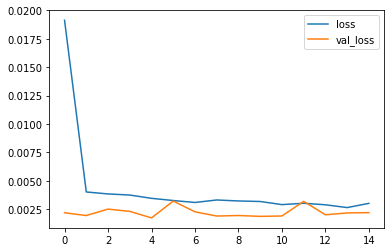

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [46]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [47]:
predictions_scaled

[array([0.23202339], dtype=float32),
 array([0.2085768], dtype=float32),
 array([0.2458292], dtype=float32),
 array([0.32300708], dtype=float32),
 array([0.39634046], dtype=float32),
 array([0.45310703], dtype=float32),
 array([0.49933589], dtype=float32),
 array([0.5297355], dtype=float32),
 array([0.53511024], dtype=float32),
 array([0.49520528], dtype=float32),
 array([0.41884002], dtype=float32),
 array([0.3237023], dtype=float32)]

#### Inverse Transformations and Comparing

In [48]:
predictions = scaler.inverse_transform(predictions_scaled)

In [49]:
compare = test[:12]

In [50]:
compare['Predictions'] = predictions

In [51]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.4732,90.566241
2017-11-01,77.4378,87.342009
2017-12-01,75.8118,92.464731
2018-01-01,83.4343,103.077763
2018-02-01,99.4899,113.162122
2018-03-01,107.3152,120.968315
2018-04-01,112.4309,127.325425
2018-05-01,110.3544,131.505795
2018-06-01,124.5841,132.244895


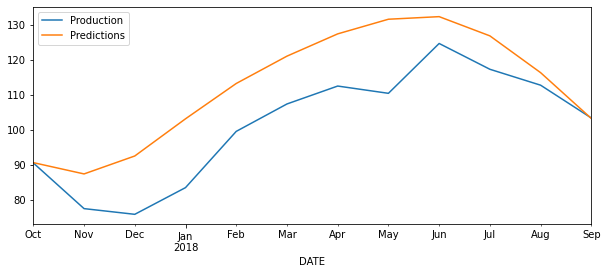

In [52]:
compare.plot(figsize = (10, 4))
plt.show()

#### Calculation R2 Score and Error Metrics

In [53]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.3051579356179629 
mae: 0.07913034304039933 
mse: 0.008665124403529517 
rmse: 0.0930866499747924


### with "relu" activation function

In [54]:
n_features = train_scaled.shape[1]

In [55]:
model = Sequential()
model.add(LSTM(100, activation = 'relu',  input_shape = (length, n_features)))#return_sequences=True,
#model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'adam', loss = 'mse')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [59]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [60]:
len(validation_generator)

12

In [61]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 5s 7ms/step - loss: 0.0227 - val_loss: 0.0094
Epoch 2/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0071 - val_loss: 0.0026
Epoch 3/20
537/537 [==============================] - 4s 6ms/step - loss: 0.0056 - val_loss: 0.0019
Epoch 4/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0059 - val_loss: 0.0048
Epoch 5/20
537/537 [==============================] - 3s 7ms/step - loss: 0.0044 - val_loss: 0.0023
Epoch 6/20
537/537 [==============================] - 3s 6ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 7/20
537/537 [==============================] - 3s 6ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 8/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 9/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0038 - val_loss: 0.0020
Epoch 10/20
537/537 [==============================] - 4s 7ms/step - loss: 0.0030 - val_loss: 0.0027

<AxesSubplot:>

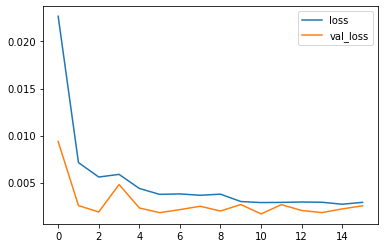

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Inverse Transformations and Comparing

In [64]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [65]:
predictions_scaled

[array([0.23202339], dtype=float32),
 array([0.2085768], dtype=float32),
 array([0.2458292], dtype=float32),
 array([0.32300708], dtype=float32),
 array([0.39634046], dtype=float32),
 array([0.45310703], dtype=float32),
 array([0.49933589], dtype=float32),
 array([0.5297355], dtype=float32),
 array([0.53511024], dtype=float32),
 array([0.49520528], dtype=float32),
 array([0.41884002], dtype=float32),
 array([0.3237023], dtype=float32)]

### Inverse Transformations and Comparing

In [66]:
predictions = scaler.inverse_transform(predictions_scaled)

In [67]:
compare = test[:12]

In [68]:
compare['Predictions'] = predictions

In [69]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.4732,90.566241
2017-11-01,77.4378,87.342009
2017-12-01,75.8118,92.464731
2018-01-01,83.4343,103.077763
2018-02-01,99.4899,113.162122
2018-03-01,107.3152,120.968315
2018-04-01,112.4309,127.325425
2018-05-01,110.3544,131.505795
2018-06-01,124.5841,132.244895


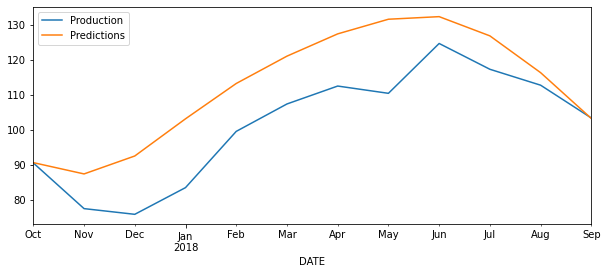

In [70]:
compare.plot(figsize = (10, 4))
plt.show()

#### Calculation R2 Score and Error Metrics

In [71]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.3051579356179629 
mae: 0.07913034304039933 
mse: 0.008665124403529517 
rmse: 0.0930866499747924


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [72]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [73]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [74]:
len(df)

573

In [75]:
len(generator)

561

In [76]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh',  input_shape = (length, n_features)))#return_sequences=True,
#model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 6s 7ms/step - loss: 0.0196
Epoch 2/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0045
Epoch 3/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0038
Epoch 4/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0036
Epoch 5/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0034
Epoch 6/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0032
Epoch 7/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0031
Epoch 8/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0032
Epoch 9/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0029
Epoch 10/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0031
Epoch 11/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0032
Epoch 12/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0029
Epoch 13/15
561/561 [====

In [77]:
scaled_full_data.shape

(573, 1)

In [78]:
scaled_full_data[-length:].shape

(12, 1)

In [79]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [80]:
forecast = scaler.inverse_transform(forecast)

In [81]:
forecast

array([[ 87.77266778],
       [ 79.80252557],
       [ 79.61557645],
       [ 86.48906414],
       [ 95.19508927],
       [102.32852792],
       [107.91586696],
       [112.17919379],
       [113.20981757],
       [108.62430401],
       [100.4275008 ],
       [ 90.05098238]])

In [82]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [83]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [84]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [85]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

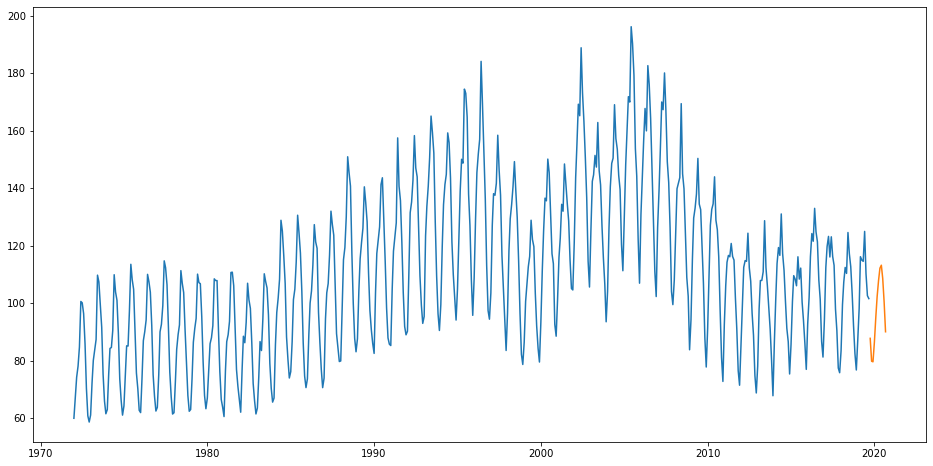

In [86]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df["Production"])
plt.plot(forecast_df.index, forecast_df['Forecast'])

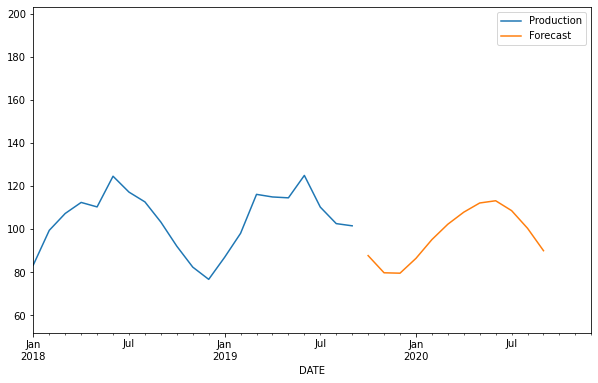

In [87]:
ax = df.plot()
forecast_df.plot(figsize = (10, 6), ax = ax)
plt.xlim('2018-01-01','2020-12-01')
plt.show()